In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


###### Dataset Representing 1 for liver disease and  2 for no liver disease

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


C:\Users\Abhinav Bagwari\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


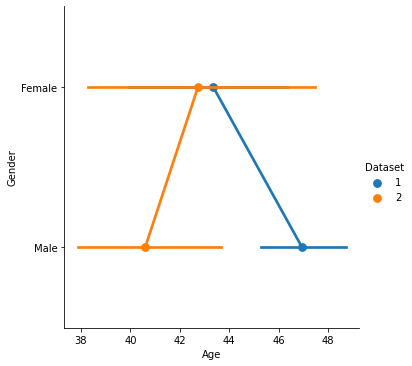

In [7]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df)
plt.show()

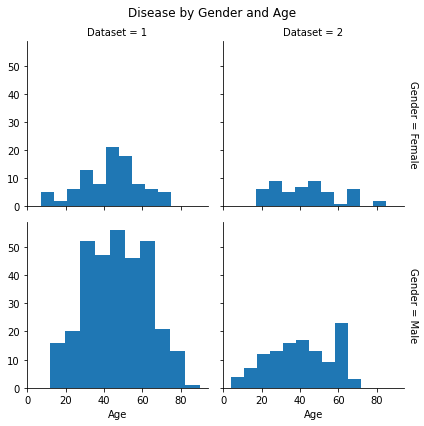

In [5]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

Number of patients diagnosed with liver disease: 416
Number of patients not diagnosed with liver disease: 167


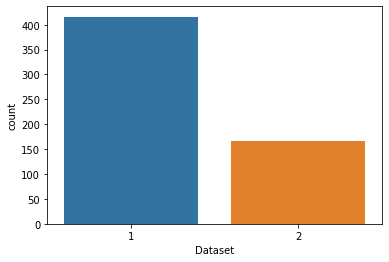

In [6]:
sns.countplot(data=df, x = 'Dataset', label='Count')
LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: {}'.format(LD))
print('Number of patients not diagnosed with liver disease: {}'.format(NLD))

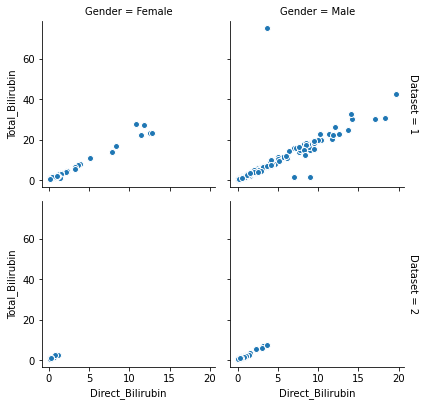

In [8]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [9]:

df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [10]:
X = df.drop(['Gender','Dataset'], axis=1)
y = df['Dataset']

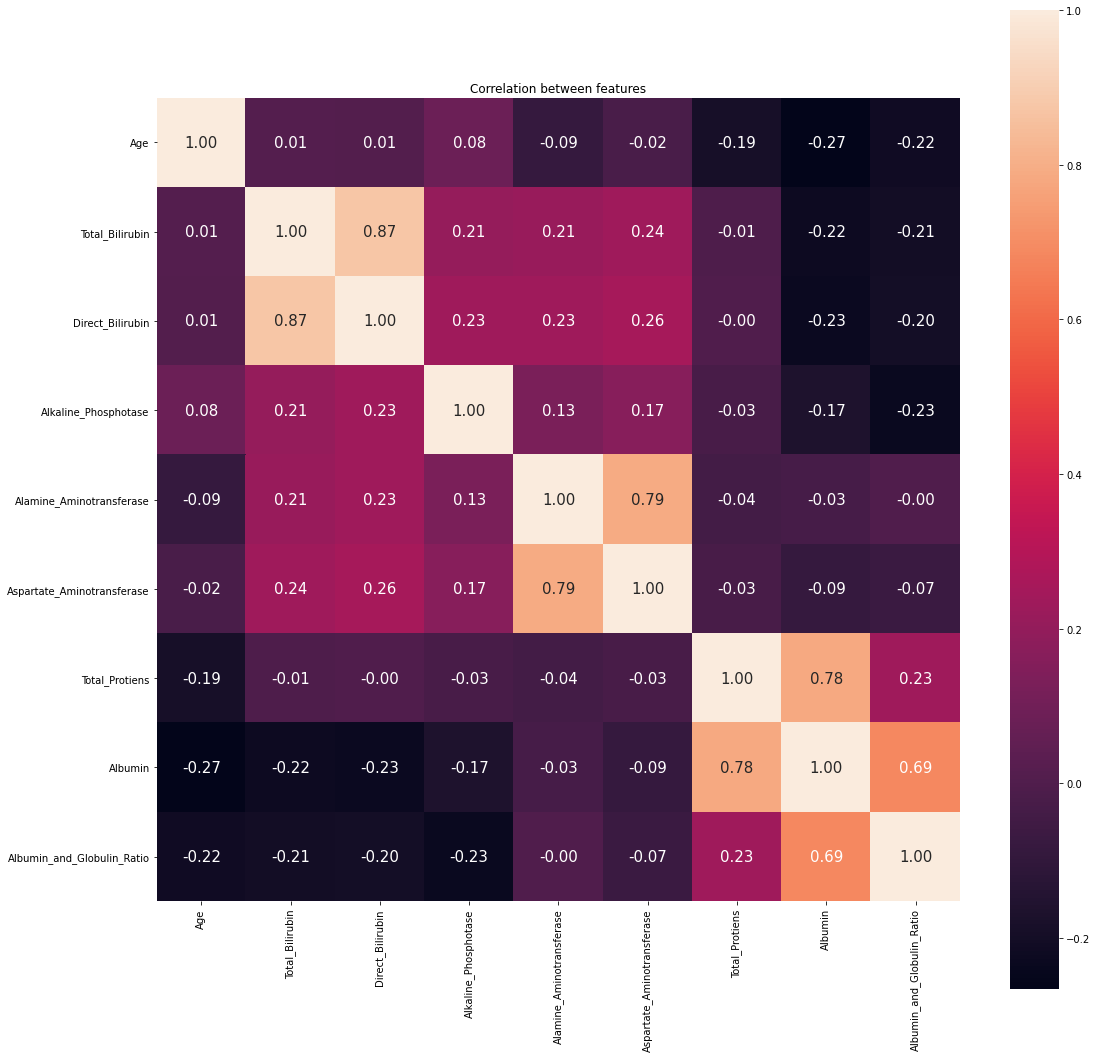

In [13]:
liver_corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= None)
plt.title('Correlation between features');